In [1]:
# p316
# 베이스 - 디지탈 신호처리 
# 디지털 필터 2가지 (이외는 파생)
# 1. CNN - FIR 필터(음성 분석) : 이전 결과값에 영향을 받지 않음 
# 2. RNN, LTSM - IIR 필터(음석 분석) : 이전 결과값에 영향을 받음
# 피드백(IRR) : 특정값을 찾아 수렴시키는 것이라고 보면 된다.
# 쿼드나 헥사를 만들 때 -> 고정값을 찾는 것 (흔들리는 센서값 찾기)
# 마이크로 펀딩 => FPGA
# apple stock, Alpahbet stock, kilinx stock 
# 주가정보, tesla news RNN으로 분석한다음 돌리기

In [2]:
# y(u, x) => ∂y / ∂u 혹은 ∂y / ∂x (u에 대한 편미분, x에 대한 편미분)
# y' = ∂y / ∂x * ∂x / ∂u 전체에 대한 미분 

In [39]:
# 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [40]:
!ls Applied-Deep-Learning-with-Keras/Lesson09

AAPL_test.csv	  Activity18.ipynb  Exercise28.ipynb
AAPL_train.csv	  Activity19.ipynb  MSFT_test.csv
Activity17.ipynb  Exercise27.ipynb  MSFT_train.csv


In [41]:
# 데이터세트 로딩
trainSet = pd.read_csv(
    'Applied-Deep-Learning-with-Keras' +
    '/Lesson09/AAPL_train.csv'
)
trainSet.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,02-01-2014,79.382858,79.575714,78.860001,79.018570,66.964325,58671200
1,03-01-2014,78.980003,79.099998,77.204285,77.282860,65.493416,98116900
2,06-01-2014,76.778572,78.114288,76.228569,77.704285,65.850533,103152700
3,07-01-2014,77.760002,77.994286,76.845711,77.148575,65.379593,79302300
4,08-01-2014,76.972855,77.937141,76.955711,77.637146,65.793633,64632400


In [6]:
# 공개주가정보 가지고 예측-> Open 주가 정보행 추출
trainSetOpen = trainSet.iloc[:, 1:2].values
trainSetOpen

array([[ 79.382858],
       [ 78.980003],
       [ 76.778572],
       ...,
       [155.839996],
       [157.5     ],
       [158.529999]])

In [7]:
# 데이터 일반화해서 특성 척도 맞추기
from sklearn.preprocessing import MinMaxScaler

In [8]:
sc = MinMaxScaler(feature_range = (0, 1))
trainSetScaled = sc.fit_transform(trainSetOpen)
trainSetScaled

array([[0.05400437],
       [0.05148716],
       [0.03773165],
       ...,
       [0.53174205],
       [0.54211448],
       [0.54855037]])

In [9]:
# 서로 다른 시점의 데이터 60개 수집 / 학습세트에 총 1,258개의 최댓값 데이터 설정
X_train = []
y_train = []

for i in range(60, 1258):
    X_train.append(trainSetScaled[i - 60:i, 0])
    y_train.append(trainSetScaled[i, 0])
    
X_train = np.array(X_train)
y_train = np.array(y_train)

In [10]:
# 데이터 모양 바꾸기
X_train = np.reshape(
    X_train, 
    (X_train.shape[0], X_train.shape[1], 1)
)
X_train

array([[[0.05400437],
        [0.05148716],
        [0.03773165],
        ...,
        [0.04582785],
        [0.04002572],
        [0.03850823]],

       [[0.05148716],
        [0.03773165],
        [0.04386406],
        ...,
        [0.04002572],
        [0.03850823],
        [0.03932056]],

       [[0.03773165],
        [0.04386406],
        [0.03894562],
        ...,
        [0.03850823],
        [0.03932056],
        [0.03800839]],

       ...,

       [[0.98231691],
        [0.97794302],
        [0.99543867],
        ...,
        [0.53811549],
        [0.48369155],
        [0.48462887]],

       [[0.97794302],
        [0.99543867],
        [1.        ],
        ...,
        [0.48369155],
        [0.48462887],
        [0.53174205]],

       [[0.99543867],
        [1.        ],
        [0.98237946],
        ...,
        [0.48462887],
        [0.53174205],
        [0.54211448]]])

In [11]:
# RNN을 구축하기위한 라이브러리 임포트 
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [12]:
# 순차모델 초기화
model = Sequential()

In [13]:
# ANN 아키텍처 구축
model.add(
    LSTM(
        50, return_sequences = True, 
        input_shape = (X_train.shape[1], 1)
    )
)
model.add(
    LSTM(50, return_sequences = True)
)
model.add(
    LSTM(50, return_sequences = True)
)
model.add(LSTM(50))
model.add(Dense(1))         

In [14]:
# 망 컴파일
model.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error'
)
model.fit(
    X_train, y_train, epochs = 100, batch_size = 32
)

Epoch 1/100
38/38 [==============================] - 2s 48ms/step - loss: 0.0248
Epoch 2/100
38/38 [==============================] - 2s 44ms/step - loss: 0.0026
Epoch 3/100
38/38 [==============================] - 2s 45ms/step - loss: 0.0021
Epoch 4/100
38/38 [==============================] - 2s 45ms/step - loss: 0.0020
Epoch 5/100
38/38 [==============================] - 2s 43ms/step - loss: 0.0018
Epoch 6/100
38/38 [==============================] - 2s 43ms/step - loss: 0.0016
Epoch 7/100
38/38 [==============================] - 2s 44ms/step - loss: 0.0014
Epoch 8/100
38/38 [==============================] - 2s 44ms/step - loss: 0.0012
Epoch 9/100
38/38 [==============================] - 2s 45ms/step - loss: 0.0013
Epoch 10/100
38/38 [==============================] - 2s 44ms/step - loss: 0.0012
Epoch 11/100
38/38 [==============================] - 2s 42ms/step - loss: 0.0014
Epoch 12/100
38/38 [==============================] - 2s 44ms/step - loss: 0.0012
Epoch 13/100
38/38 [=====

In [15]:
# 테스트 데이터 로딩 및 처리 
testSet = pd.read_csv(
    'Applied-Deep-Learning-with-Keras' +
    '/Lesson09/AAPL_test.csv'
)
testSet.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,02-01-2019,154.889999,158.850006,154.229996,157.919998,157.245605,37039700
1,03-01-2019,143.979996,145.720001,142.000000,142.190002,141.582779,91244100
2,04-01-2019,144.529999,148.550003,143.800003,148.259995,147.626846,58607100
3,07-01-2019,148.699997,148.830002,145.899994,147.929993,147.298264,54777800
4,08-01-2019,149.559998,151.820007,148.520004,150.750000,150.106216,41025300


In [16]:
actualstock = testSet.iloc[:, 1:2].values
actualstock

array([[154.889999],
       [143.979996],
       [144.529999],
       [148.699997],
       [149.559998],
       [151.289993],
       [152.5     ],
       [152.880005],
       [150.850006],
       [150.270004],
       [153.080002],
       [154.199997],
       [157.5     ],
       [156.410004],
       [154.149994],
       [154.110001],
       [155.479996],
       [155.789993],
       [156.25    ],
       [163.25    ],
       [166.110001]])

In [17]:
# 데이터 합치기 
total = pd.concat(
    (trainSet['Open'], testSet['Open']),
    axis = 0
)

In [25]:
# 테스트 데이터 준비 : 입력모양바꾸기, 척도 맞추기
inputs = total[len(total) - len(testSet)-60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)
X_test = []
for i in range(60, 81):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
predictedStock = model.predict(X_test)
predictedStock = sc.inverse_transform(predictedStock)

<function matplotlib.pyplot.show(*args, **kw)>

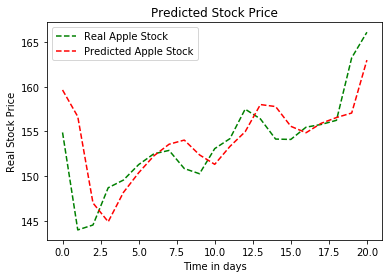

In [29]:
# 결과 시각화
plt.plot(
    actualstock, color = 'green',
    label = 'Real Apple Stock', ls = '--'
)
plt.plot(
    predictedStock, color = 'red',
    label = 'Predicted Apple Stock', ls = '--'
)
plt.title('Predicted Stock Price')
plt.xlabel('Time in days')
plt.ylabel('Real Stock Price')
plt.legend()
plt.show
# IIR 필터의 특성이 나타나고 있음
# 위상이 뒤틀린다. 
# 데이터가 이틀씩 뒤쳐지고 있음 -> 이 데이터로 주식예측하면 폭망

In [ ]:
# 1. 새로운 터미널을 킨다.
# 2. pip uninstall -y keras
# 3. pip uninstall -y tensorflow
# 4. pip uninstall -y tensorflow-gpu
# 5. rm -rf ~/.keras
# 6. 새로 킨 터미널을 껏다가 다시 킨다.
# 7. pip install tensorflow==1.14
# 8. pip install keras==2.2.5
# 9. 터미널을 다시 껏다가 킨다.
# 10. jupyter notebook을 구동시킨다.

In [32]:
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import preprocess_input
from keras.applications.resnet50 import ResNet50
from keras_preprocessing import image
import numpy as np

In [33]:
def prepare_img(img, target):
    img = img.resize(target)
    img = img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    img = imagenet_utils.preprocess_input(img)
    
    return img

In [34]:
resModel = None

def load_model():
    global resModel
    resModel = ResNet50()

In [35]:
import keras.backend.tensorflow_backend as tb
import tensorflow as tf

global graph, model
graph = tf.get_default_graph()

print(tf.__version__)

1.14.0


In [36]:
from flask import Flask, request, jsonify
from werkzeug.utils import secure_filename

In [ ]:
app = Flask(__name__)

@app.route('/imgServer', methods = ['GET', 'POST'])
def analysis_img():
    data = {"success": False}
    if request.method == 'POST':
        print('POST')
        file = request.files['file']
        file = secure_filename(file.filename)
        print(file)
        
        sea_img = image.load_img(
            file, target_size = (224, 224)
        )
        
        trans_img = image.img_to_array(sea_img)
        trans_img = np.expand_dims(trans_img, axis = 0)
        trans_img = preprocess_input(trans_img)
        print(trans_img.shape)
        
        # tensorflow 세션을 열고 자동으로 닫아주는 역할
        with graph.as_default():
            pred = resModel.predict(trans_img)
            
        label = decode_predictions(pred)
        data["predictions"] = []
        
        for (imageNetID, label, prob) in label[0]:
            r = {
                "label": label, 
                "probability": float(prob)
            }
            data["predictions"].append(r)
            
        data["success"] = True
        
    return jsonify(data)

if __name__ == "__main__":
    load_model()
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


POST
test_image_2.jpg
(1, 224, 224, 3)
40960/35363 [==================================] - 0s 0us/step


127.0.0.1 - - [20/Jul/2020 15:23:34] "POST /imgServer HTTP/1.1" 200 -
127.0.0.1 - - [20/Jul/2020 15:23:34] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [20/Jul/2020 15:28:32] "GET /imgServer HTTP/1.1" 200 -
127.0.0.1 - - [20/Jul/2020 15:28:44] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [20/Jul/2020 15:28:58] "POST /imgServer HTTP/1.1" 200 -


POST
test_image_2.jpg
(1, 224, 224, 3)
